# Depression Classifier (The User Needs Mental Health Treatment or Doesn't Need Mental Health Treatment)

### **Libraries**

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_curve
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### **Data Wrangling**

**Gathering Data**

In [2]:
data = pd.read_csv('/content/DepressionData.csv')

**Assessing Data**

In [3]:
data.head()

,Name,Gender,Age,City,WorkOrStudent,Profession,AcademicPress,WorkPress,CGPA,StudySatis,JobSatis,SleepDr,DietHabits,Degree,SuicidalTh,WSHours,FinancialStress,FamHistory,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,Yes
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,Yes
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             2556 non-null   object 
 1   Gender           2556 non-null   object 
 2   Age              2556 non-null   int64  
 3   City             2556 non-null   object 
 4   WorkOrStudent    2556 non-null   object 
 5   Profession       1883 non-null   object 
 6   AcademicPress    502 non-null    float64
 7   WorkPress        2054 non-null   float64
 8   CGPA             502 non-null    float64
 9   StudySatis       502 non-null    float64
 10  JobSatis         2054 non-null   float64
 11  SleepDr          2556 non-null   object 
 12  DietHabits       2556 non-null   object 
 13  Degree           2556 non-null   object 
 14  SuicidalTh       2556 non-null   object 
 15  WSHours          2556 non-null   int64  
 16  FinancialStress  2556 non-null   int64  
 17  FamHistory    

**Cleaning Data**

In [5]:
data["JobSatis"] = data["JobSatis"].fillna(data["StudySatis"])

In [6]:
data["WorkPress"] = data["WorkPress"].fillna(data["AcademicPress"])

In [7]:
data = data.rename(columns={"WorkPress": "Pressure", "JobSatis": "Satisfaction"})

In [8]:
data = data.drop(["Name", "Age", "City", "Profession", "CGPA", "Degree", "AcademicPress", "StudySatis"], axis=1)

In [9]:
data.head()

,Gender,WorkOrStudent,Pressure,Satisfaction,SleepDr,DietHabits,SuicidalTh,WSHours,FinancialStress,FamHistory,Depression
0,Female,Working Professional,2.0,4.0,7-8 hours,Moderate,No,6,2,No,No
1,Male,Working Professional,4.0,3.0,5-6 hours,Unhealthy,Yes,0,4,Yes,Yes
2,Female,Working Professional,2.0,3.0,5-6 hours,Moderate,No,0,2,No,No
3,Female,Working Professional,3.0,5.0,7-8 hours,Healthy,Yes,1,2,Yes,Yes
4,Male,Working Professional,4.0,3.0,7-8 hours,Moderate,Yes,6,5,Yes,Yes


In [10]:
le_Gender = LabelEncoder()
le_WorkOrStudent = LabelEncoder()
le_Pressure = LabelEncoder()
le_Satisfaction = LabelEncoder()
le_SleepDr = LabelEncoder()
le_DietHabits = LabelEncoder()
le_SuicidalTh = LabelEncoder()
le_FamHistory = LabelEncoder()
le_Depression = LabelEncoder()

In [11]:
if "Gender" in data.columns:
  data["Gender"] = le_Gender.fit_transform(data["Gender"])
if "WorkOrStudent" in data.columns:
  data["WorkOrStudent"] = le_Gender.fit_transform(data["WorkOrStudent"])
if "Pressure" in data.columns:
  data["Pressure"] = le_Gender.fit_transform(data["Pressure"])
if "Satisfaction" in data.columns:
  data["Satisfaction"] = le_Gender.fit_transform(data["Satisfaction"])
if "SleepDr" in data.columns:
  data["SleepDr" ] = le_Gender.fit_transform(data["SleepDr" ])
if "DietHabits" in data.columns:
  data["DietHabits"] = le_Gender.fit_transform(data["DietHabits"])

In [12]:
if "SuicidalTh" in data.columns:
  data["SuicidalTh"] = data["SuicidalTh"].apply(lambda x: 1 if x =="Yes" else 0)
if "FamHistory" in data.columns:
  data["FamHistory"] = data["FamHistory"].apply(lambda x: 1 if x =="Yes" else 0)
if "Depression" in data.columns:
  data["Depression"] = data["Depression"].apply(lambda x: 1 if x =="Yes" else 0)

In [13]:
for column in data.columns:
  if data[column].isnull().sum() > 0:
    if data[column].type in ["int64"]:
      data[column].fillna(int(round(data[column].mean())), inplace=True)
    else:
      data[column].fillna(data[column].mode()[0], inplace=True)

In [14]:
oldData_length = data.shape[0]

In [15]:
data = data.drop_duplicates()

In [16]:
newData_length = data.shape[0]

In [17]:
print(f"Total data before removing duplicates: {oldData_length}")
print(f"Total data after removing duplicates: {newData_length}")

Total data before removing duplicates: 2556
Total data after removing duplicates: 2541


In [18]:
data.head()

,Gender,WorkOrStudent,Pressure,Satisfaction,SleepDr,DietHabits,SuicidalTh,WSHours,FinancialStress,FamHistory,Depression
0,0,1,1,3,1,1,0,6,2,0,0
1,1,1,3,2,0,2,1,0,4,1,1
2,0,1,1,2,0,1,0,0,2,0,0
3,0,1,2,4,1,0,1,1,2,1,1
4,1,1,3,2,1,1,1,6,5,1,1


In [19]:
data.loc[((data["Pressure"] >= 4) & (data["SleepDr"] <= 1)) | (data["SuicidalTh"] == 1), "Depression"] = 1

### **Training the Model**

**Installing Tensorflow Decision Forests**

In [20]:
!pip install tensorflow_decision_forests

**Importing the tfdf Library**

In [21]:
import tensorflow_decision_forests as tfdf

**Training the Data**

In [22]:
data_train = data.sample(frac=0.8, random_state=42)
data_test = data.drop(data_train.index)

In [23]:
dataset_train = tfdf.keras.pd_dataframe_to_tf_dataset(data_train, label="Depression")
dataset_test = tfdf.keras.pd_dataframe_to_tf_dataset(data_test, label="Depression")

In [24]:
model = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.CLASSIFICATION)
num_trees = 80
max_depth = 8
model.compile(metrics=["accuracy"])

Use /tmp/tmp7ooaaq2p as temporary training directory


In [25]:
model.fit(dataset_train)

Reading training dataset...
Training dataset read in 0:00:12.631626. Found 2033 examples.
Training model...
Model trained in 0:00:00.742723
Compiling model...
Model compiled.


In [26]:
evaluation = model.evaluate(dataset_test, return_dict = True)
print("Evaluation model: ", evaluation)

1/1 [==============================] - 1s 777ms/step - loss: 0.0000e+00 - accuracy: 0.9941
Evaluation model:  {'loss': 0.0, 'accuracy': 0.9940944910049438}


**Prediction Model**

In [27]:
prediction = model.predict(dataset_test)

1/1 [==============================] - 0s 179ms/step


In [28]:
accuracy = evaluation['accuracy']
print(f"Accuracy model: {accuracy * 100:.2f}%")

Accuracy model: 99.41%


**Threshold**

In [29]:
predictions = (prediction > 0.5).astype(int)

**Evaluation Matrix**

In [30]:
print(classification_report(data_test["Depression"], predictions))

accuracy = accuracy_score(data_test["Depression"], predictions)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       153
           1       1.00      0.99      1.00       355

    accuracy                           0.99       508
   macro avg       0.99      1.00      0.99       508
weighted avg       0.99      0.99      0.99       508



In [31]:
y_true = []
y_pred = []

for features, labels in dataset_test:
  y_true.append(labels.numpy())
  y_pred.append(model.predict(features))

16/16 [==============================] - 0s 7ms/step


In [32]:
y_true = np.concatenate(y_true, axis = 0)
y_pred = np.concatenate(y_pred, axis = 0)

In [33]:
y_pred = predictions

In [34]:
confusionMatrix = confusion_matrix(y_true, y_pred)

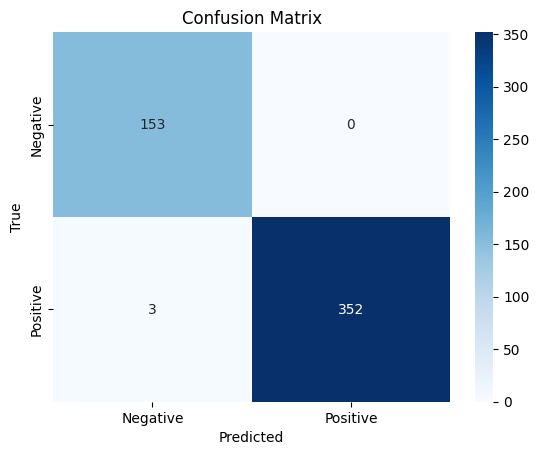

In [35]:
sns.heatmap(confusionMatrix, annot = True, fmt = "d", cmap = "Blues", xticklabels = ["Negative", "Positive"], yticklabels = ["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### **Testing the Model**

In [36]:
def validateInput(userInput, inputType, validRange = None):
    try:
        userInput = InputType(UserInput)

        if validRange:
            if userInput not in validRange:
                raise ValueError(f"Input must be within range {valid_range}")

        return userInput
    except ValueError:
        raise ValueError("Invalid Input")

In [37]:
def test_model(model):
    gender = int(input("Enter your gender (0/1): "))
    workorstudent = int(input("Enter your job (0/1): "))
    pressure = int(input("How are your work or study pressure (1/2/3/4/5): "))
    satisfaction = int(input("How are your work or study satisfaction (1/2/3/4/1) : "))
    sleepdr = int(input("How are your sleep duration (0/1/2/3): "))
    diethabits = int(input("How are your dietary habits (0/1/2): "))
    suicidalth = int(input("Have you ever experienced suicidal thoughts (0/1): "))
    wshours = int(input("Enter your work or study hours (0/1/2/3/4/5/6/7/8/9/10/11/12): "))
    financialstress = int(input("Enter your financial stress (1/2/3/4/5)}: "))
    famhistory = int(input("Does your family have a history of mental illness (0/1): "))


    userInput = {
        "Gender": gender,
        "WorkOrStudent": workorstudent,
        "Pressure": pressure,
        "Satisfaction": satisfaction,
        "SleepDr": sleepdr,
        "DietHabits": diethabits,
        "SuicidalTh": suicidalth,
        "WSHours": wshours,
        "FinancialStress": financialstress,
        "FamHistory": famhistory
    }

    input_df = pd.DataFrame([userInput])
    input_tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(input_df)

    prediction = model.predict(input_tf_dataset)

    if prediction[0][0] > 0.5 :
        print("Prediction: Depression")
    else:
        print("Prediction: No Depression")

In [38]:
test_model(model)

Enter your gender (0/1): 1
Enter your job (0/1): 0
How are your work or study pressure (1/2/3/4/5): 3
How are your work or study satisfaction (1/2/3/4/1) : 1
How are your sleep duration (0/1/2/3): 1
How are your dietary habits (0/1/2): 2
Have you ever experienced suicidal thoughts (0/1): 1
Enter your work or study hours (0/1/2/3/4/5/6/7/8/9/10/11/12): 6
Enter your financial stress (1/2/3/4/5)}: 3
Does your family have a history of mental illness (0/1): 0
1/1 [==============================] - 0s 53ms/step
Prediction: Depression
